# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
#IMPORTS:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
import seaborn as sns

In [2]:
# Your code here. 
st_data = pd.DataFrame({
                        'age': [17, 51, 27,21,36, 48 ,19, 26, 54, 30],
                        'tardies': [10, 1 , 5 , 9 , 4 , 2 , 9 , 6 , 0 ,3]})
st_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0.5, 1.0, 'Data class')

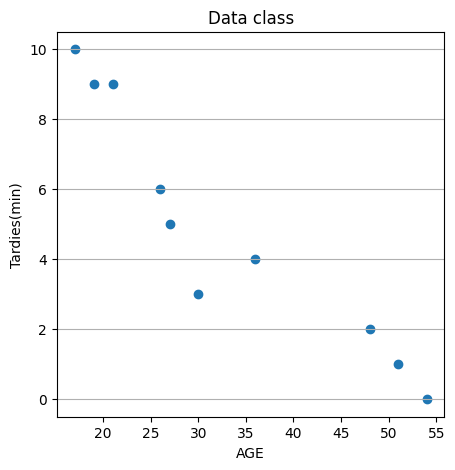

In [3]:
# Your code here.
plt.figure(figsize= (5, 5))
plt.scatter(st_data.age, st_data.tardies)
plt.xlabel('AGE')
plt.ylabel('Tardies(min)')
plt.grid(visible = True,
        axis = 'y' )
plt.title('Data class')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# La tendencia a simple vista es que que existe una relación lineal(de pendiente negativa) entre la edad y el tiempo que se llega tarde.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
covariance = st_data.age.cov(st_data.tardies)
correlation = st_data.age.corr(st_data.tardies)


In [6]:
covariance

-45.56666666666666

In [7]:
correlation

-0.9391626886887122

In [8]:
#Comments:
# Podemos ver que ambas son negativas por lo tanto confirmamos lo mismo que con el scatter.plot:
#A más edad menos min de tardanza( inversamente relacionadas)
# La correlación,-0.9, es bastante alta en términos negativos.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your code here.
#Definimos variables.
X = st_data.drop(columns = 'tardies')                
y = st_data.tardies

In [10]:
#Iniciamos el modelo:
linreg = LinReg()

In [11]:
# Vamos a hacer el fit al modelo:
linreg.fit(X, y)

LinearRegression()

In [12]:
# Usamos un modelo de regresion lineal

In [13]:
intercept = linreg.intercept_    # beta0, ordenada en el origen
intercept

12.888803363135771

In [14]:
linreg.coef_        # betas, desde 1 a N, numero que acompaña a la X, la pendiente, la m
coef = linreg.coef_[0]

In [15]:
dict(zip(X.columns, linreg.coef_))

{'age': -0.2428207709159809}

Plot your regression model on your scatter plot.

In [16]:
# Your code here.

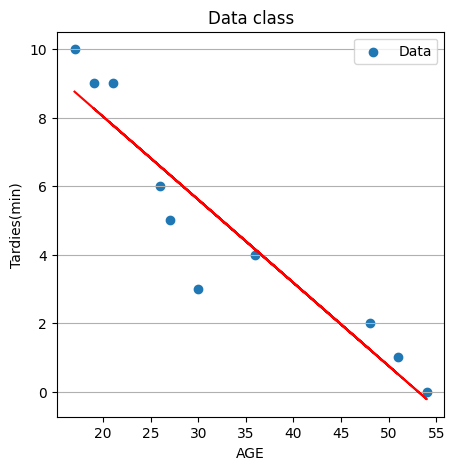

In [17]:

plt.figure(figsize= (5, 5))

plt.scatter(st_data.age, st_data.tardies, label='Data')
plt.plot( X, coef * X + intercept, color='red')

plt.xlabel('AGE')
plt.ylabel('Tardies(min)')
plt.grid(visible=True, axis='y')
plt.title('Data class')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Your response here. 
# Import any libraries you may need & the data
# Hacemos la división entre train y test. Vamos a dejar un 80% en train y un 20% en test
df = pd.read_csv('vehicles.csv')
df.columns = df.columns.str.replace('.', '_').str.replace(' ', '_').str.replace('/', '_').str.lower()
df.info()# sin nulos, dos columnas object
df.head() 
# variable dependiente a estudiar CO2_emission/grams_mile
#ear, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make                     35952 non-null  object 
 1   model                    35952 non-null  object 
 2   year                     35952 non-null  int64  
 3   engine_displacement      35952 non-null  float64
 4   cylinders                35952 non-null  float64
 5   transmission             35952 non-null  object 
 6   drivetrain               35952 non-null  object 
 7   vehicle_class            35952 non-null  object 
 8   fuel_type                35952 non-null  object 
 9   fuel_barrels_year        35952 non-null  float64
 10  city_mpg                 35952 non-null  int64  
 11  highway_mpg              35952 non-null  int64  
 12  combined_mpg             35952 non-null  int64  
 13  co2_emission_grams_mile  35952 non-null  float64
 14  fuel_cost_year        

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [28]:
# Your response here. 
#Correlaciones :
df_analysis = df.drop(columns = ['make', 'model','engine_displacement','transmission','drivetrain','vehicle_class', 'fuel_type','city_mpg', 'highway_mpg'])                

correlations = df_analysis.corr()
correlations

,year,cylinders,fuel_barrels_year,combined_mpg,co2_emission_grams_mile,fuel_cost_year
year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
fuel_barrels_year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
combined_mpg,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
co2_emission_grams_mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
fuel_cost_year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


<Figure size 1500x1000 with 0 Axes>

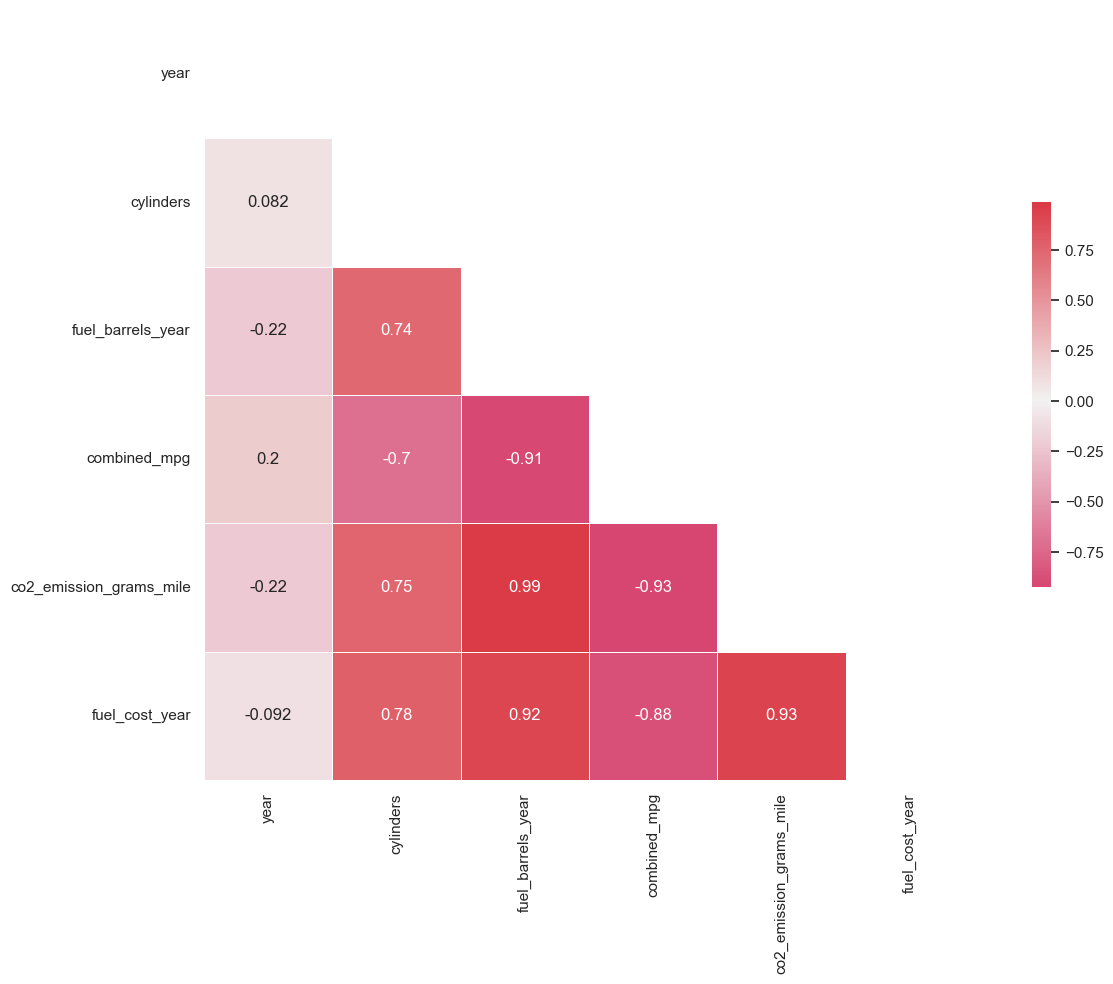

In [29]:
#pintamos las correlaciones:
plt.figure(figsize = (15,10))
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df_analysis.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_analysis.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [ ]:
#Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions?
#La variable con mayor corrleacion con  co2_emission_grams_mile es fuel_barrels_year
#La que menos es el año

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [31]:
# Your response here. 
#Definimos variables.
X = df_analysis.drop(columns = 'co2_emission_grams_mile')
y = df_analysis.co2_emission_grams_mile
#Hacemos el split entre train y test:
X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size = 0.8,
                                       test_size = 0.2,
                                       random_state = 42)
#Comprobamos el tamaño de cada una:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28761, 5), (7191, 5), (28761,), (7191,))

In [34]:
#Iniciamos el modelo:
linreg = LinReg()
linreg

LinearRegression()

In [35]:
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
linreg.intercept_    # beta0, ordenada en el origen

755.6935073143679

In [36]:
dict(zip(X_train.columns, linreg.coef_))  # betas, desde 1 a N

{'year': -0.3155867545879126,
 'cylinders': 1.7940263231035138,
 'fuel_barrels_year': 19.231027286739906,
 'combined_mpg': -2.933573199591574,
 'fuel_cost_year': 0.031971450640956744}

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 